Linear = garis lurus  
Regression = kembali ke sebelumnya

## Simple Linear Regression

Simple linear regression adalah pendekatan untuk memprediksi sebuah response menggunakan satu variable (Continous).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv('melb_data.csv')

In [4]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


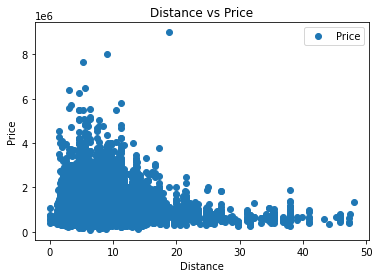

In [7]:
dataset.plot(x = 'Distance', y = 'Price', style = 'o')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

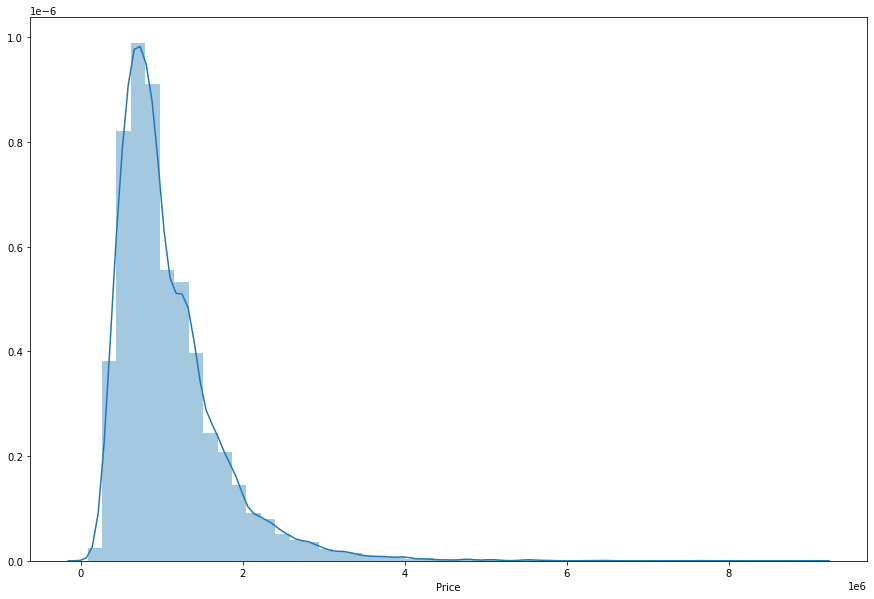

In [35]:
plt.figure(figsize = (15,10))
plt.tight_layout()
sns.distplot(dataset['Price'])

#### Memisahkan feature / variable independen (x) dengan variable dependen (y) / Target

In [10]:
X = dataset['Distance'].values.reshape(-1,1)
y = dataset['Price'].values.reshape(-1,1)

#### Memisahkan Data menjadi Data Train dan Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Training Model dengan Data Train

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Mencari nilai Slope & Intercept

***Y = mx + c***  


Y = variable dependen  
x = variable independen  
m = slope  
c = intercept / constanta

In [21]:
#To retrieving the intercept
print(regressor.intercept_) 
#For retrieving the slope
print(regressor.coef_)

[1253020.23097842]
[[-17477.41099535]]


In [25]:
# harga rumah jika jaraknya 40km
(-17477.41099535*40)+(1253020.23097842)

553923.79116442

#### Membuat kolom 'y Predict'

In [22]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})

In [33]:
df

,Actual,Predicted
0,2165000.0,1.113201e+06
1,815000.0,1.137669e+06
2,610000.0,1.069507e+06
3,1245000.0,1.174372e+06
4,1160000.0,1.104462e+06
...,...,...
2711,305000.0,1.141165e+06
2712,1412000.0,1.113201e+06
2713,1230000.0,1.064264e+06
2714,1270000.0,1.144660e+06


#### Visualisasi perbandingan y Actual dengan y Pred

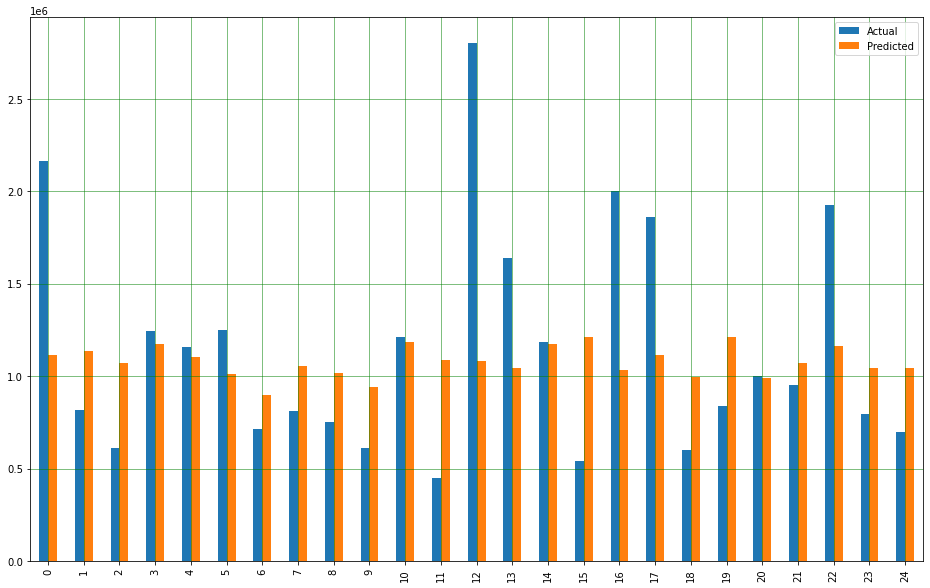

In [36]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (16,10))
plt.grid(which = 'major', linestyle= '-', linewidth = '0.5', color ='green')
plt.grid(which = 'minor', linestyle= ':', linewidth = '0.5', color ='black')
plt.show()

## Evaluation Metrics

In [37]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Max Error :', round(metrics.max_error(y_test, y_pred), 2))

Mean Absolute Error : 453479.31553528755
Mean Squared Error : 383466291875.1081
Root Mean Squared Error : 619246.5517668291
Max Error : 5199412.0


Max error = error terbesar, RMSE lanjutannya MSE (standard deviasei error)

In [38]:
print('MedAE :', 
     round(metrics.median_absolute_error(y_test, y_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y_test, y_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y_test, y_pred)))
print('R2 Score :',
     round(metrics.r2_score(y_test, y_pred), 2))

MedAE : 366714.5
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.03


### TUGAS TAKEHOME

1. Dataset yang digunakan adalah melb_data.csv. X = Distance, Y = Price 


2. Buat beberapa percobaan untuk menemukan model SLR terbaik.


3. Data Train 80%, urutan percobaan :  
    a) Distance tidak ada intervensi sama sekali  
    b) Distance = handle missing value  
    c) Distance = langkah (b) + handle outlier  
    d) Distance = langkah (b & c) + scaling  


4. Data Train 90%, urutan percobaan :  
    a) Distance tidak ada intervensi sama sekali  
    b) Distance = handle missing value  
    c) Distance = langkah (b) + handle outlier  
    d) Distance = langkah (b & c) + scaling 


5. Di setiap percobaan tampilkan MAE, MSE dan RMSE.